#### Data Manipulation

##### a-c

In [1]:
import pandas as pd
data = pd.read_csv('data.csv')
data.describe()

,Duration,Pulse,Maxpulse,Calories
count,169.000000,169.000000,169.000000,164.000000
mean,63.846154,107.461538,134.047337,375.790244
std,42.299949,14.510259,16.450434,266.379919
min,15.000000,80.000000,100.000000,50.300000
25%,45.000000,100.000000,124.000000,250.925000
50%,60.000000,105.000000,131.000000,318.600000
75%,60.000000,111.000000,141.000000,387.600000
max,300.000000,159.000000,184.000000,1860.400000


##### d

In [2]:
print('Null values:',data.isnull().sum())
mean_calories = data['Calories'].mean()
data['Calories'].fillna(mean_calories,inplace=True)
print('\nNull values after replacing with mean:',data.isnull().sum())

Null values: Duration    0
Pulse       0
Maxpulse    0
Calories    5
dtype: int64

Null values after replacing with mean: Duration    0
Pulse       0
Maxpulse    0
Calories    0
dtype: int64


##### e

In [3]:
data.groupby(['Duration','Pulse']).agg({'Calories':['min','max','count','mean']})

Calories                      
                    min     max count    mean
Duration Pulse                               
15       80        50.5    50.5     1    50.5
         124      124.2   124.2     1   124.2
20       83        50.3    50.3     1    50.3
         95        77.7    77.7     1    77.7
         106      110.4   110.4     1   110.4
...                 ...     ...   ...     ...
180      101      600.1   600.1     1   600.1
210      108     1376.0  1376.0     1  1376.0
         137     1860.4  1860.4     1  1860.4
270      100     1729.0  1729.0     1  1729.0
300      108     1500.2  1500.2     1  1500.2

[94 rows x 4 columns]

##### f

In [4]:
data[(data['Calories']>=500) & (data['Calories']<=1000)]

,Duration,Pulse,Maxpulse,Calories
51,80,123,146,643.1
62,160,109,135,853.0
65,180,90,130,800.4
66,150,105,135,873.4
67,150,107,130,816.0
72,90,100,127,700.0
73,150,97,127,953.2
75,90,98,125,563.2
78,120,100,130,500.4
83,120,100,130,500.0


##### g

In [5]:
data[(data['Calories']>500) & (data['Pulse']<100)]

,Duration,Pulse,Maxpulse,Calories
65,180,90,130,800.4
70,150,97,129,1115.0
73,150,97,127,953.2
75,90,98,125,563.2
99,90,93,124,604.1
103,90,90,100,500.4
106,180,90,120,800.3
108,90,90,120,500.3


##### h

In [6]:
df_modified = data[['Duration','Pulse','Calories']]
df_modified

,Duration,Pulse,Calories
0,60,110,409.1
1,60,117,479.0
2,60,103,340.0
3,45,109,282.4
4,45,117,406.0
...,...,...,...
164,60,105,290.8
165,60,110,300.0
166,60,115,310.2
167,75,120,320.4


##### i

In [7]:
data = data.drop(['Maxpulse'],axis=1)
data

,Duration,Pulse,Calories
0,60,110,409.1
1,60,117,479.0
2,60,103,340.0
3,45,109,282.4
4,45,117,406.0
...,...,...,...
164,60,105,290.8
165,60,110,300.0
166,60,115,310.2
167,75,120,320.4


##### j

In [13]:
data['Calories'] = data['Calories'].astype(int)
data

,Duration,Pulse,Calories
0,60,110,409
1,60,117,479
2,60,103,340
3,45,109,282
4,45,117,406
...,...,...,...
164,60,105,290
165,60,110,300
166,60,115,310
167,75,120,320


##### k

<AxesSubplot:xlabel='Duration', ylabel='Calories'>

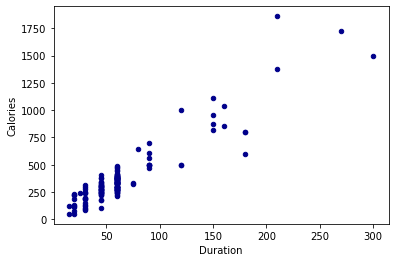

In [17]:
data.plot.scatter(x='Duration',y='Calories',c='Darkblue')

#### Linear regression 

##### a

In [18]:
sal = pd.read_csv('Salary_data.csv')
sal

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


##### b-d

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
X = sal[['YearsExperience']]
Y = sal[['Salary']]
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size =1/3)
clf = LinearRegression()
clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)
print('Predicted salary values:\n\n', y_predict)
print('\n\nMean squared error:',mean_squared_error(y_test, y_predict))

Predicted salary values:

 [[ 37157.58866759]
 [103970.09679585]
 [117144.39417326]
 [111498.2667258 ]
 [ 63506.1834224 ]
 [101147.03307213]
 [ 64447.20466364]
 [ 61624.14093991]
 [ 64447.20466364]
 [ 72916.39583483]]


Mean squared error: 33251901.06851391


##### e

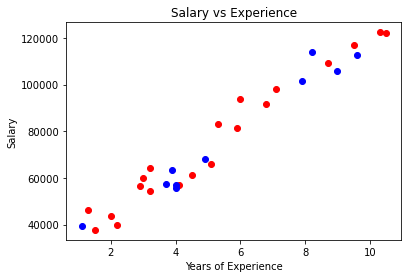

In [38]:
import matplotlib.pyplot as plt
plt.scatter(x_train, y_train, color = "red")
plt.scatter(x_test, y_test, color = "blue")
plt.title("Salary vs Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()